<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №4

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data_fifa.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

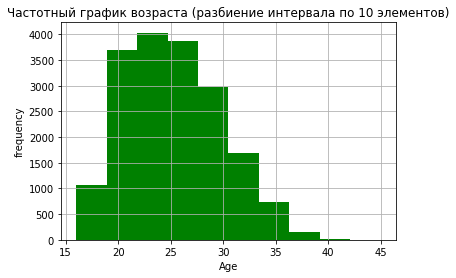

In [3]:
n, bins, patches = plt.hist(data['Age'], 10, facecolor='g')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Частотный график возраста (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

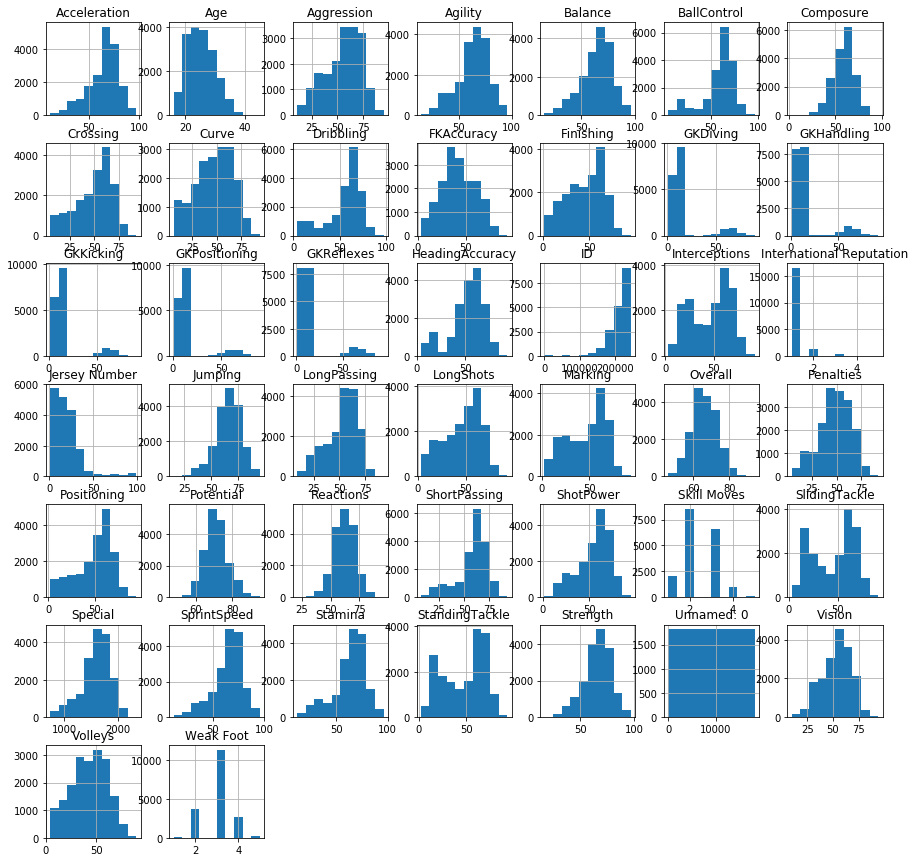

In [4]:
data.hist(figsize=(15,15))
plt.show()

Довольно много графиков с нормальным распределением, например, Age, Agression, Agility, Balance, Composure и др, но есть и графики с другими видами распределений.

Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?